# 📦 E-Commerce Shipping Data

*Product Shipment Delivered on Time ?*

## Dataset Overview

This dataset is provided by an *international e-commerce company selling electronic products*, aiming to uncover insights from its customer database.

### Dataset Description

- **Source**: [Kaggle](https://www.kaggle.com/datasets/prachi13/customer-analytics)
- **Purpose**: To analyze factors affecting timely product delivery and improve service.

### Key Variables

- **ID**: ID Number of Customers.
- **Warehouse Block**: Section of the warehouse (A, B, C, D, E) where the product is stored.
- **Mode of Shipment**: Shipping method (e.g., Ship, Flight, Road).
- **Customer Care Calls**: The number of calls made by customers to inquire about the status of their shipments.
- **Customer Rating**: Rating from 1 (worst) to 5 (best).
- **Cost of the Product**: Price in US dollars.
- **Prior Purchases**: Number of prior purchases by the customer.
- **Product Importance**: Categorized as low, medium, or high.
- **Gender**: Customer's gender (Male/Female).
- **Discount Offered**: Applied discount.
- **Weight in Grams**: Product weight.
- **Reached on Time**: Target variable; 1 = not on time, 0 = on time.

### Project Goals

In this notebook, I will first focus on **exploratory data analysis (EDA)** to gain a comprehensive understanding of the dataset and the relationships between different variables. This step is crucial for preparing the dataset for the second part, which will be dedicated to the **development of machine learning models**.

The aim is to **predict if an item will arrive on time** based on the outlined characteristics. By identifying trends through visualizations and statistical analysis, we can help the company enhance operations and serve customers better.

## Data Wrangling

### Getting Started
*Importation of Libraries and Data Loading*

In [1]:
# Import necessary libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline

In [2]:
# Load the data
data = pd.read_csv('/Users/arnaudrivat/Documents/Porfolio Arnaud Rivat/Projet n°1/Train.csv')
print("The first 5 rows of the dataframe") 
data.head()

The first 5 rows of the dataframe


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


### Cleaning and Transformation
*In this section, we clean and transform the dataset by removing irrelevant columns, renaming variables for clarity, and verifying the presence of missing values or duplicate entries to ensure data quality.*


In [3]:
# Dropping the 'ID' column as it is not relevant for the analysis or modeling
data.drop('ID', axis=1, inplace=True)

# Rename the column 'Reached.on.Time_Y.N' to 'Reached_on_Time'
data.rename(columns={'Reached.on.Time_Y.N' : 'Reached_on_Time'} , inplace= True)
data

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_Time
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
10994,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,C,Ship,5,4,242,5,low,F,4,1155,0
10997,F,Ship,5,2,223,6,medium,M,2,1210,0


- The dataset we are working on contains 10,999 observations and 11 variables.

In [4]:
# Data type of each column and Missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached_on_Time      10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 945.4+ KB


- All columns contain 10999 non-null values, which means **there are no missing data entries**.

- **All columns have appropriate data types** for further exploratory data analysis.

In [5]:
# Count the number of numerical and categorical variables
num = data.select_dtypes(include='number').shape[1] 
cat = data.select_dtypes(include='object').shape[1]  

print(f'Number of categorical variables: {cat}')
print(f'Number of numerical variables: {num}')

Number of categorical variables: 4
Number of numerical variables: 7


In [6]:
# Check for duplicate rows
duplicate_count = data.duplicated().sum()
result = 'Each row is unique ; there are no duplicates' if duplicate_count == 0 else f'Number of duplicates: {duplicate_count}'
print(result)

Each row is unique ; there are no duplicates


**Disclaimer:** The presence of identical rows in the dataset does not necessarily indicate an error or data quality issue. It is possible, though unlikely, that two customers could have placed similar orders: selecting the same product, shipment mode, receiving the same discount, or even giving the same rating. In such cases, while the rows may appear as duplicates, they actually represent distinct customer transactions. Therefore, care must be taken when handling these rows to avoid losing valuable data.

However, in our case, this issue does not arise since all rows in the dataset are unique.


## Exploratory Data Analysis (EDA)

### Descriptive Statistics

In [7]:
# Summary of Numerical Variables
data.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached_on_Time
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [8]:
# Value Counts for Categorical Variables
cat_var = data.select_dtypes(include='object').columns
for cat in cat_var:
    print(f'Value counts for {cat}:\n{data[cat].value_counts()}\n')

Value counts for Warehouse_block:
Warehouse_block
F    3666
D    1834
A    1833
B    1833
C    1833
Name: count, dtype: int64

Value counts for Mode_of_Shipment:
Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: count, dtype: int64

Value counts for Product_importance:
Product_importance
low       5297
medium    4754
high       948
Name: count, dtype: int64

Value counts for Gender:
Gender
F    5545
M    5454
Name: count, dtype: int64



### Data Visualisation

### Correlation of Numerical Features

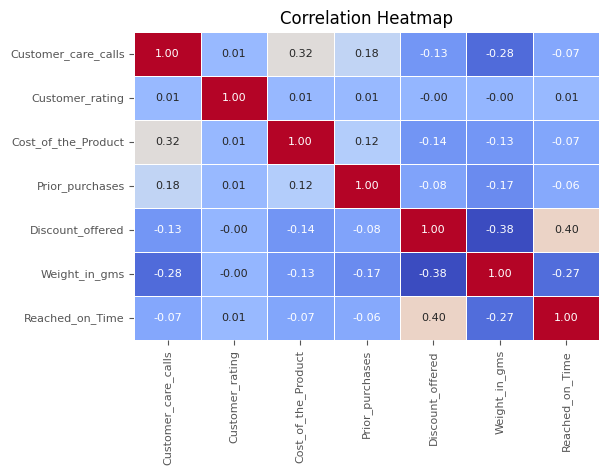

In [9]:
df_num = data.select_dtypes(include='number')

plt.figure(figsize= (6,4))
sns.heatmap(df_num.corr() , 
            annot= True,
            cbar= False,
            cmap= 'coolwarm',
            fmt= '.2f',
            linecolor= 'white', 
            linewidths= 0.5,
            annot_kws= {"size": 8})

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title('Correlation Heatmap', fontsize=12)
plt.show()

- **"Discount_offered"** shows the strongest correlation with the target variable **"Reached_on_Time"**, with a moderate positive correlation (**0.40**). This suggests that products with higher discounts are more likely to be **delivered late**.

- On the other hand, **product weight** exhibits a moderate **negative correlation (-0.27)**, indicating that **heavier products are less likely to be delayed**, while lighter products tend to experience more delays.

- Variables like **"Customer_care_calls"**, **"Cost_of_the_Product"**, **"Prior_purchases"**, and **"Customer_rating"** do not show any significant relationship with the likelihood of a product being delivered on time.


## Model Development

Normalisation des données + Variables cat à encoder à faire avant la modélisation mais après EDA 

Plusieurs variables numériques, comme le Cost of the product (entre 96 et 310), les Discount offered (1 à 65) et le Weight in gms (1001 à 7846), ont des plages de valeurs très différentes. Cela peut poser problème pour certains modèles d'apprentissage automatique qui sont sensibles aux échelles des données, comme :

Normaliser ou standardiser les données met toutes les variables sur une échelle similaire, ce qui peut améliorer les performances de ces modèles.